# Create a CNN
    
This Notebook uses Keras to create a CNN model and train it.

In [ ]:
# check python version
!python --version

In [ ]:
#Installation
!pip install scipy

## 1. IMPORTS

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models 
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

## PARAMS

## 2. PATHS

In [32]:
modelName = 'model_4'
baseDir = 'workspace'
# Define Paths
paths = {
    'train': os.path.join(baseDir,'training_data'),
    'test': os.path.join(baseDir,'test_data'),
    # Training Data
    'trainDamBottle': os.path.join(baseDir,'training_data','dam_bottle'),
    'trainNormBottle': os.path.join(baseDir,'training_data','norm_bottle'),
    'trainDamLabel': os.path.join(baseDir,'training_data','dam_label'),
    'trainNormLabel': os.path.join(baseDir,'training_data','norm_label'),
    'trainOpenBottle': os.path.join(baseDir,'training_data','open_bottle'),
    'trainClosedBottle': os.path.join(baseDir,'training_data','closed_bottle'),
    # Testing Data
    'testDamBottle': os.path.join(baseDir,'test_data','dam_bottle'),
    'testNormBottle': os.path.join(baseDir,'test_data','norm_bottle'),
    'testDamLabel': os.path.join(baseDir,'test_data','dam_label'),
    'testNormLabel': os.path.join(baseDir,'test_data','norm_label'),
    'testOpenBottle': os.path.join(baseDir,'test_data','open_bottle'),
    'testClosedBottle': os.path.join(baseDir,'test_data','closed_bottle'),
    # Other Paths
    'model': os.path.join(baseDir,'models',modelName),
    'checkpoints': os.path.join(baseDir,'models',modelName,'checkpoints'),
}
# Create Paths
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}
        
labelMap = ['closed Bottle', 'dam Bottle', 'dam Label', 'norm Bottle', 'norm Label',
               'open  Bottle']

1150.png


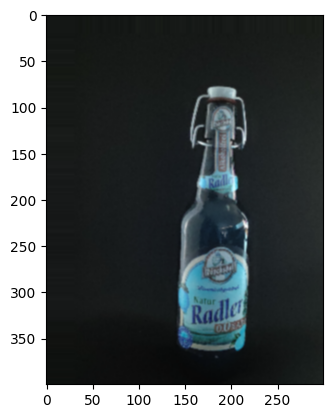

In [3]:
imgs= os.listdir(paths['testNormLabel'])
print(imgs[0])
plt.imshow(cv.imread(os.path.join(paths['testNormLabel'],imgs[10])))

## 3. Build Model

In [58]:
imgWidth = 150
imgHeight = 200
inputShape= (imgWidth, imgHeight,3)
batchSize = 32

In [ ]:
# GPU
tensorflow.python.client.device_lib.list_local_devices()

from keras import backend as K

K.set_session(tf.Session(config=tf.ConfigProto(device_count={'GPU': 1})))

In [59]:
def model1():
    model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu', input_shape=inputShape))
    model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(Dropout(0.2))

    model.add(layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    model.add(Dropout(0.2))
    model.add(layers.Dense(64, activation='softmax'))

    model.add(layers.Dense(len(labelMap)))

In [60]:
def model2():
    model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu', input_shape=inputShape))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(64, activation='softmax'))
    model.add(layers.Dense(len(labelMap)))

In [61]:
def model3():
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(len(labelMap), activation='softmax'))
    
# dense typically in middle 
# conv2d in beginning --> kernel size
# pooling reduce params after conv2d
# flatten 1 dim layer before dense and after conv2d
# dropout sets to zero

In [64]:
def model4():
    model.add(Conv2D(64, kernel_size=(8,8), activation='relu', input_shape=inputShape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(61, activation='relu'))
    
    model.add(Dense(len(labelMap)))
    

In [70]:
def model5():
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=inputShape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='relu'),'softmax')
    
    model.add(Dense(len(labelMap)))
# VGG-16

In [65]:
model = models.Sequential()
model4()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 143, 193, 64)      12352     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 71, 96, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 94, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 34, 47, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 102272)            0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [66]:

earlystop = EarlyStopping(monitor= 'loss',patience=6)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.00001)
# checkpoints every 5 epochs
checkpoint_path = paths['checkpoints']+"/cp-{epoch:04d}.ckpt"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batchSize)
                                            
callbacks = [earlystop, learning_rate_reduction,cp_callback]


In [67]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['acc'])

In [68]:
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normierung Daten auf Intervall von 0 bis 1 fuer besseres Berechnen
    rotation_range=10, # Gradbereich um den Bilder zufällig gedreht werden
    width_shift_range=0.2, # Bereich als Bruchteil der Breite, in dem zufaellig verschoben wird
    height_shift_range = 0.2,  # Bereich als Bruchteil der Hoehe, in dem zufaellig verschoben wird
    shear_range = 0.2, # Bereich fuer zufaellige Scherung
    zoom_range = 0.2, # Bereich fuer zufaelliges Reinzoomen
    #horizontal_flip = True #zufaelliges horizintales Spiegeln
    )
# rescalen der Testdaten 
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

# laden der Bilder über den ImageDataGenerator 
train_generator = train_datagen.flow_from_directory(
    paths['train'],
    target_size=(imgWidth, imgHeight),
    batch_size  = batchSize,
    class_mode = 'binary' 
)

test_generator = test_datagen.flow_from_directory(
    paths['test'],
    target_size=(imgWidth, imgHeight),
    batch_size  = batchSize,
    class_mode = 'binary' 
)

Found 4329 images belonging to 6 classes.
Found 975 images belonging to 6 classes.


In [69]:
history = model.fit(train_generator,
steps_per_epoch=135,
epochs = 20,
batch_size = batchSize,
validation_data = test_generator,
validation_steps=20,
callbacks=callbacks
)

Epoch 1/20
135/135 [==============================] - 527s 4s/step - loss: 8.2008 - acc: 0.0519 - val_loss: 7.8396 - val_acc: 0.0516 - lr: 0.0010
Epoch 2/20
 24/135 [====>.........................] - ETA: 6:38 - loss: 7.8359 - acc: 0.0469
Epoch 2: saving model to workspace\models\model_4\checkpoints\cp-0002.ckpt
135/135 [==============================] - 506s 4s/step - loss: 7.8350 - acc: 0.0505 - val_loss: 7.8255 - val_acc: 0.0531 - lr: 0.0010
Epoch 3/20
 49/135 [=========>....................] - ETA: 5:32 - loss: 7.8348 - acc: 0.0505
Epoch 3: saving model to workspace\models\model_4\checkpoints\cp-0003.ckpt
135/135 [==============================] - 539s 4s/step - loss: 7.8349 - acc: 0.0507 - val_loss: 7.8348 - val_acc: 0.0531 - lr: 0.0010
Epoch 4/20
 74/135 [===============>..............] - ETA: 2:22 - loss: 7.8353 - acc: 0.0525
Epoch 4: saving model to workspace\models\model_4\checkpoints\cp-0004.ckpt
135/135 [==============================] - 323s 2s/step - loss: 7.8347 - acc: 0.

In [33]:
model.save(paths['model'])

INFO:tensorflow:Assets written to: workspace\models\model_4\assets


INFO:tensorflow:Assets written to: workspace\models\model_4\assets


<Figure size 640x480 with 0 Axes>

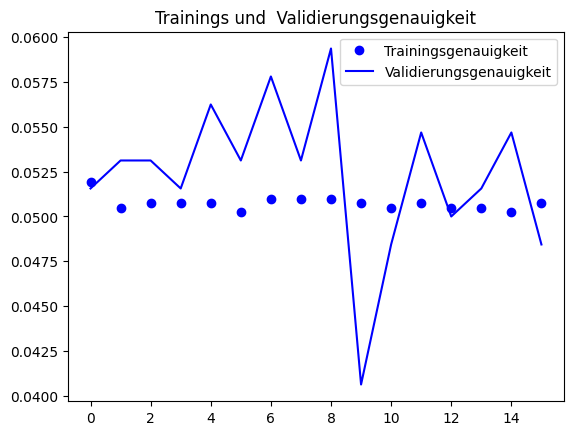

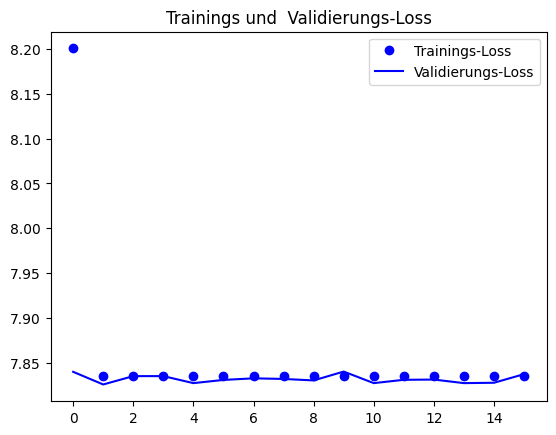

<Figure size 640x480 with 0 Axes>

In [71]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Trainingsgenauigkeit')
plt.plot(epochs,val_acc,'b',label='Validierungsgenauigkeit')
plt.title('Trainings und  Validierungsgenauigkeit')
plt.legend()
plt.savefig(paths['model']+'/accuracy.png')
plt.figure()

plt.plot(epochs,loss,'bo',label='Trainings-Loss')
plt.plot(epochs,val_loss,'b',label='Validierungs-Loss')
plt.title('Trainings und  Validierungs-Loss')
plt.legend()
plt.savefig(paths['model']+'/loss.png')
plt.figure()